In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
df=pd.read_csv("JFK_AA")

In [3]:
df

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,AA,01/01/2017,LAX,08:00,08:31,402.0,398.0,31.0,27.0,0.0,0.0,0.0,0.0
1,AA,01/01/2017,SFO,07:00,06:56,405.0,387.0,-4.0,0.0,0.0,0.0,0.0,0.0
2,AA,01/01/2017,SFO,08:25,08:24,407.0,388.0,-1.0,0.0,0.0,0.0,0.0,0.0
3,AA,01/01/2017,LAX,09:00,08:56,406.0,397.0,-4.0,0.0,0.0,0.0,0.0,0.0
4,AA,01/01/2017,LAX,19:00,19:22,407.0,416.0,22.0,22.0,0.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46289,AA,12/31/2018,AUS,19:29,19:34,264.0,264.0,5.0,0.0,0.0,0.0,0.0,0.0
46290,AA,12/31/2018,DCA,15:43,15:43,92.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
46291,AA,12/31/2018,EGE,10:40,10:36,292.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0
46292,AA,12/31/2018,SAN,17:45,17:46,383.0,420.0,1.0,0.0,0.0,37.0,0.0,1.0


In [4]:
df1=df.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [5]:
df1.head(100)

,Date (MM/DD/YYYY),Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,01/01/2017,16021.0,15485.0,1324.0,1243.0,0.0,198.0,0.0,71.0
1,01/01/2018,13304.0,12787.0,1032.0,817.0,5.0,88.0,0.0,25.0
2,01/01/2019,12652.0,12354.0,58.0,109.0,0.0,226.0,0.0,19.0
3,01/02/2017,16023.0,16175.0,800.0,181.0,0.0,597.0,0.0,280.0
4,01/02/2018,13592.0,12441.0,157.0,50.0,0.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,02/01/2019,14265.0,13434.0,389.0,170.0,7.0,179.0,0.0,41.0
96,02/02/2017,14280.0,14794.0,143.0,99.0,0.0,743.0,0.0,27.0
97,02/02/2018,13471.0,13761.0,312.0,37.0,0.0,353.0,0.0,351.0
98,02/02/2019,9877.0,9245.0,30.0,62.0,0.0,16.0,0.0,0.0


In [6]:
df1['Date'] = pd.to_datetime(df1['Date (MM/DD/YYYY)'])

In [7]:
df1=df1.drop(['Date (MM/DD/YYYY)'],axis=1)

In [8]:
df2=df1.sort_values(by=['Date'],ascending=False)

In [9]:
df2

,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
818,11611.0,11087.0,-40.0,4.0,0.0,11.0,0.0,112.0,2019-09-30
815,11833.0,11222.0,106.0,191.0,0.0,17.0,0.0,0.0,2019-09-29
812,10496.0,10328.0,416.0,127.0,0.0,88.0,0.0,264.0,2019-09-28
809,11281.0,10059.0,373.0,170.0,0.0,62.0,0.0,129.0,2019-09-27
806,11611.0,11524.0,112.0,56.0,0.0,266.0,0.0,86.0,2019-09-26
...,...,...,...,...,...,...,...,...,...
12,14785.0,15169.0,286.0,318.0,0.0,424.0,11.0,15.0,2017-01-05
9,13572.0,13261.0,223.0,299.0,0.0,40.0,0.0,0.0,2017-01-04
6,14273.0,14015.0,1779.0,847.0,0.0,451.0,24.0,734.0,2017-01-03
3,16023.0,16175.0,800.0,181.0,0.0,597.0,0.0,280.0,2017-01-02


In [10]:
df2['Half year']=pd.qcut(df2['Date'],q=12)

In [11]:
df3=df2.groupby('Half year')

In [12]:
df4=df3[['Departure delay (Minutes)','Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']].sum()

In [13]:
df4.sort_values(by=['Departure delay (Minutes)'],ascending=False)

,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
Half year,,,,,,
"(2017-03-25 12:00:00, 2017-06-17]",73823.0,25057.0,508.0,29325.0,408.0,31175.0
"(2017-06-17, 2017-09-08 12:00:00]",68977.0,26420.0,646.0,36261.0,205.0,24142.0
"(2018-05-17, 2018-08-08 12:00:00]",52131.0,16234.0,1958.0,26061.0,71.0,18803.0
"(2016-12-31 23:59:59.999999999, 2017-03-25 12:00:00]",44233.0,21273.0,4428.0,25842.0,122.0,11596.0
"(2019-07-08 12:00:00, 2019-09-30]",42970.0,14554.0,1971.0,20187.0,0.0,16185.0
"(2019-04-16, 2019-07-08 12:00:00]",37743.0,13796.0,1839.0,17768.0,91.0,16209.0
"(2017-12-01, 2018-02-22 12:00:00]",29751.0,12821.0,7161.0,10222.0,130.0,8791.0
"(2019-01-22 12:00:00, 2019-04-16]",28107.0,13789.0,2152.0,23507.0,35.0,11561.0
"(2018-10-31, 2019-01-22 12:00:00]",27419.0,11042.0,4047.0,13672.0,16.0,10150.0


In [14]:
y_axis=[]

In [15]:
a=df1['Delay Carrier (Minutes)'].sum()
b=df1['Delay Weather (Minutes)'].sum()
c=df1['Delay National Aviation System (Minutes)'].sum()
d=df1['Delay Security (Minutes)'].sum()
e=df1['Delay Late Aircraft Arrival (Minutes)'].sum()
x_axis=['Delay Carrier (Minutes)','Delay Weather (Minutes)','Delay National Aviation System (Minutes)','Delay Security (Minutes)','Delay Late Aircraft Arrival (Minutes)']
y_axis=[a,b,c,d,e]

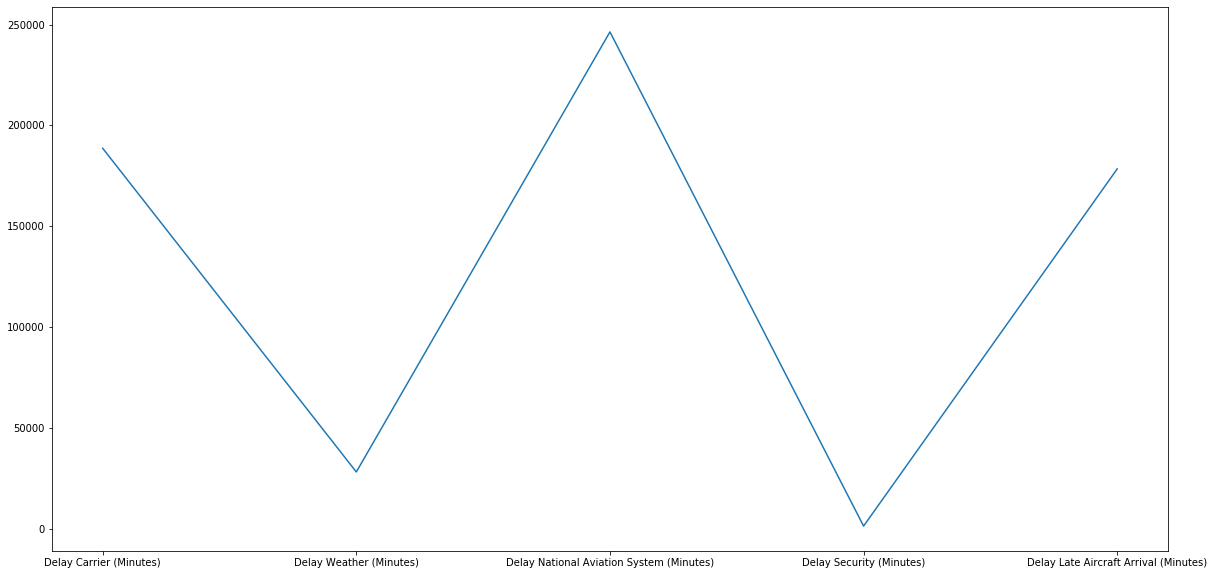

In [16]:
plt.figure(figsize=(20,10))
plt.plot(x_axis,y_axis)

plt.savefig("delay_reason.png")

Is there any relationship between delay carrier and delay weather?

In [17]:
population1 = df1['Departure delay (Minutes)']

In [18]:
population2 = df1['Delay Weather (Minutes)']

In [19]:
df['Delay Weather (Minutes)'].sum()

28142.0

In [20]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=21.178781939923592, pvalue=1.762912694802822e-84)

In [21]:
population3= df1['Delay Carrier (Minutes)']

In [22]:
df1['Delay Carrier (Minutes)'].sum()

188675.0

In [23]:
stats.ttest_ind(population1, population3, equal_var=False)

Ttest_indResult(statistic=13.052738053454416, pvalue=9.913830201273679e-37)

In [24]:
population4= df1['Delay National Aviation System (Minutes)']

In [25]:
df['Delay National Aviation System (Minutes)'].sum()

246378.0

In [26]:
stats.ttest_ind(population1, population4, equal_var=False)

Ttest_indResult(statistic=10.10336263255484, pvalue=3.0270543778845754e-23)

In [27]:
population5= df1['Delay Late Aircraft Arrival (Minutes)']

In [28]:
df1['Delay Late Aircraft Arrival (Minutes)'].sum()

178445.0

In [29]:
stats.ttest_ind(population1, population5, equal_var=False)

Ttest_indResult(statistic=13.506027421686067, pvalue=4.651561001103754e-39)

In [30]:
df1['Delay Security (Minutes)'].sum()

1297.0

In [31]:
stats.f_oneway(population2,population3,population4,population5)

F_onewayResult(statistic=126.58798675082315, pvalue=2.4261027053765914e-78)

In [32]:
df.count()

Carrier Code                                46294
Date (MM/DD/YYYY)                           46294
Destination Airport                         46294
Scheduled departure time                    46294
Actual departure time                       46294
Scheduled elapsed time (Minutes)            46294
Actual elapsed time (Minutes)               46294
Departure delay (Minutes)                   46294
Delay Carrier (Minutes)                     46294
Delay Weather (Minutes)                     46294
Delay National Aviation System (Minutes)    46294
Delay Security (Minutes)                    46294
Delay Late Aircraft Arrival (Minutes)       46294
dtype: int64

In [56]:
df_1=df[df['Departure delay (Minutes)']>0]

In [76]:
df_1.count()

Carrier Code                                14364
Date (MM/DD/YYYY)                           14364
Destination Airport                         14364
Scheduled departure time                    14364
Actual departure time                       14364
Scheduled elapsed time (Minutes)            14364
Actual elapsed time (Minutes)               14364
Departure delay (Minutes)                   14364
Delay Carrier (Minutes)                     14364
Delay Weather (Minutes)                     14364
Delay National Aviation System (Minutes)    14364
Delay Security (Minutes)                    14364
Delay Late Aircraft Arrival (Minutes)       14364
dtype: int64

In [57]:
y=df_1['Departure delay (Minutes)']

In [58]:
x=df_1['Delay Weather (Minutes)']

In [59]:
(slope, intercept, _, _, _) = linregress(x, y)
fit = slope * x + intercept

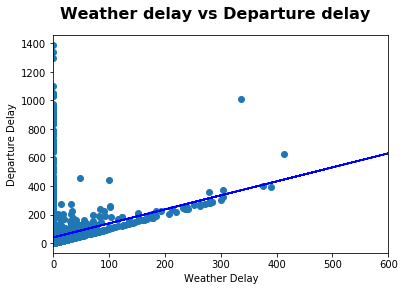

In [60]:
fig, ax = plt.subplots()

fig.suptitle("Weather delay vs Departure delay", fontsize=16, fontweight="bold")
ax.set_xlim(0, 600)

ax.set_xlabel("Weather Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x, y, linewidth=0, marker='o')
ax.plot(x, fit, 'b--')

plt.show()

In [61]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-58.85771504607275, pvalue=0.0)

In [62]:
x1=df_1['Delay Carrier (Minutes)']

In [63]:
(slope, intercept, _, _, _) = linregress(x1, y)
fit1 = slope * x1 + intercept

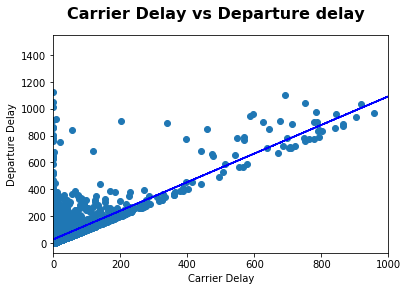

In [64]:
fig, ax = plt.subplots()

fig.suptitle("Carrier Delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 1000)

ax.set_xlabel("Carrier Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x1, y, linewidth=0, marker='o')
ax.plot(x1, fit1, 'b--')

plt.show()

In [41]:
stats.ttest_ind(x1, y, equal_var=False)

Ttest_indResult(statistic=-23.081661365246884, pvalue=1.763528026403261e-117)

In [65]:
x2=df_1['Delay National Aviation System (Minutes)']

In [66]:
(slope, intercept, _, _, _) = linregress(x2, y)
fit2 = slope * x2 + intercept

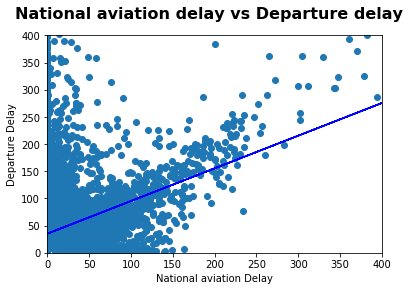

In [67]:
fig, ax = plt.subplots()

fig.suptitle("National aviation delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 400)

ax.set_xlabel("National aviation Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x2, y, linewidth=0, marker='o')
ax.plot(x2, fit2, 'b--')

plt.show()

In [68]:
stats.ttest_ind(x2, y, equal_var=False)

Ttest_indResult(statistic=-42.83977251382835, pvalue=0.0)

In [69]:
x3=df_1['Delay Late Aircraft Arrival (Minutes)']

In [70]:
(slope, intercept, _, _, _) = linregress(x3, y)
fit3 = slope * x3 + intercept

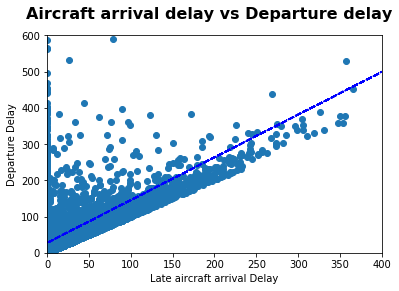

In [71]:
fig, ax = plt.subplots()

fig.suptitle("Aircraft arrival delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 400)
ax.set_ylim(0, 600)

ax.set_xlabel("Late aircraft arrival Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x3, y, linewidth=0, marker='o')
ax.plot(x3, fit3, 'b--')

plt.show()

In [72]:
stats.ttest_ind(x3, y, equal_var=False)

Ttest_indResult(statistic=-40.35554646920461, pvalue=0.0)

In [73]:
x4=df_1['Delay Security (Minutes)']

In [74]:
(slope, intercept, _, _, _) = linregress(x4, y)
fit4 = slope * x4 + intercept

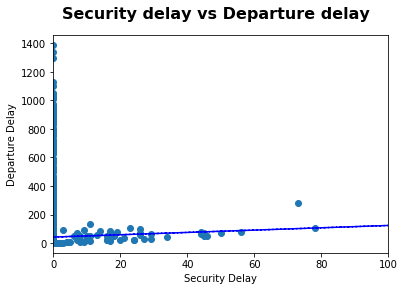

In [75]:
fig, ax = plt.subplots()

fig.suptitle("Security delay vs Departure delay", fontsize=16, fontweight="bold")

ax.set_xlim(0, 100)

ax.set_xlabel("Security Delay")
ax.set_ylabel("Departure Delay")

ax.plot(x4, y, linewidth=0, marker='o')
ax.plot(x4, fit4, 'b--')

plt.show()